### Credit Card Fraud Detection

Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
#### Context
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration

##### Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
train = pd.read_csv("creditcard_train.csv")
test = pd.read_csv("creditcard_test.csv") 

##### It can be seen that all features are numerical

In [2]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Some observations
    1) By comparing the 25% percentile with the minimum values (and 75% with the maximum values), it can be seen that there are outliers present in dataset (i.e. 75%=77.575, max=25691)
    2) The last transaction was after 2 days since first transaction (172792.000000/3600)
    3) "Amount" feature is right-skewed and most transactions are less than 100, the biggest transaction was 25691.
    4) PCA requires preliminary feature standardization (Z-score normalization), it means that V1-V28 are scaled. V1-V28 all have approximately mean=0, and std around 1.

In [4]:
train.iloc[:, 0:-1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,...,284657.000000,284657.000000,284379.000000,284137.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000
mean,94820.043168,0.000942,-0.000761,0.001280,-0.000844,0.000591,0.000233,0.000956,-0.000145,0.000553,...,-0.000092,-0.000075,-0.000035,0.000011,0.000045,-0.000016,0.000008,-0.000056,-0.000008,88.340966
std,47486.331846,1.955946,1.649907,1.510265,1.413999,1.378060,1.332089,1.230796,1.192554,1.097575,...,0.770867,0.733731,0.725929,0.625052,0.605657,0.521244,0.482238,0.403245,0.330077,250.129519
min,0.000000,-56.407510,-72.715728,-48.325590,-5.683171,-113.743300,-26.160506,-43.557240,-73.216718,-13.434070,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430080,0.000000
25%,54208.000000,-0.920083,-0.598696,-0.889759,-0.848833,-0.691445,-0.768153,-0.553921,-0.208633,-0.642783,...,-0.211747,-0.228421,-0.542878,-0.162192,-0.354543,-0.317147,-0.326978,-0.070844,-0.052954,5.600000
50%,84704.000000,0.018393,0.065213,0.179930,-0.020146,-0.054336,-0.274058,0.040115,0.022323,-0.051198,...,-0.062507,-0.029518,0.007694,-0.011614,0.041012,0.016532,-0.052152,0.001326,0.011233,22.000000
75%,139324.000000,1.315753,0.803360,1.027294,0.742826,0.611926,0.398611,0.570420,0.327241,0.597343,...,0.132994,0.186287,0.529204,0.148051,0.439603,0.350702,0.240932,0.091001,0.078243,77.150000
max,172792.000000,2.454930,22.057730,9.382558,16.875340,34.801666,73.301630,120.589500,20.007208,15.594990,...,39.420904,27.202839,10.503090,22.528410,4.584549,7.519589,3.517346,31.612200,33.847808,25691.160000


##### Duplicates

In [5]:
duplicated = train.duplicated().value_counts()
print('There are {} duplicates out of {} rows in dataset.'.format(duplicated[True], train.shape[0]))

There are 1076 duplicates out of 284657 rows in dataset.


In [6]:
dupl_class=train[train.duplicated()].Class.value_counts()
print('There are {} fraudulent records out of {} duplicates'.format(dupl_class[1], duplicated[True]))

There are 15 fraudulent records out of 1076 duplicates


I will drop duplicated data, as there are not so many duplicated fraud transactions. Drop duplicates:

In [7]:
train = train.drop_duplicates()

##### We can see proportion of missing values (if any) in columns 

In [8]:
print('There are {} rows in train dataset with missing values'.format(train.isnull().any(axis=1).sum()))
print('There are {} columns in train dataset with missing values:'.format(train.isnull().any().sum()))
na_columns = train.isnull().sum()
na_columns[na_columns>0]

There are 798 rows in train dataset with missing values
There are 2 columns in train dataset with missing values:


V22    278
V23    520
dtype: int64

#### Distribution of target variable in rows with missing values

In [9]:
train[train.isnull().any(axis=1)]['Class'].value_counts()

0    798
Name: Class, dtype: int64

 We can safely drop missing values and still have sufficiently large dataset, since there are only 798 missing rows (less than 0.3% of whole dataset) and all of them are not fraudulent instances(class=0). Moreover, we will undersample our dataset due to small number of fraud transactions

In [10]:
train.dropna(inplace=True)

##### Distribution of target variable in test and train
The train dataset is highly imbalanced (very small number of frauds in whole dataset)

In [11]:
print("Distribution of train['Class']: \n{}\n\n".format(train['Class'].value_counts()),
      "Distribution of test['Class']: \n{}".format(test['Class'].value_counts()))

Distribution of train['Class']: 
0    282356
1       427
Name: Class, dtype: int64

 Distribution of test['Class']: 
0    100
1     50
Name: Class, dtype: int64


##### Check outliers

In [12]:
Q1 = train.iloc[:,:-1].quantile(0.25) # Do not include "Class" when checking outliers
Q3 = train.iloc[:,:-1].quantile(0.75)
IQR = Q3 - Q1
# Do not include "Class" when checking outliers
no_outliers = train[((train.iloc[:,:-1] >= Q1-2.5*IQR) & (train.iloc[:,:-1] <= Q3+2.5*IQR)).all(axis=1)] 
no_outliers.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


It can be seen that after removing outliers a large number of frauds are lost.

In [13]:
no_outliers.Class.value_counts()

0    211931
1        31
Name: Class, dtype: int64

In real life fraudulent transactions are very rare and almost always different from normal ones. For example, it is quite obvious that frauds should be on average higher in amount, because scammers usually want to make as much profit as possible (I will check this assumption in module 2). In fact we can use anomaly detection techniques to find fraudulent/suspicious transactions. Therefore, removing outliers will result in losing substantial number of class=1 transactions. That's why I won't remove outliers for now, and may consider removing them after undersampling data.

### Module 2: Data Visualization

#### Since the range of values (variability)  for features is large, I will sometimes use logscale to make graphs more readable and concise

#### Distributions of V1-V28 for both classes (density plots)
Some of the features are normally distributed. For some features distribtuions for 2 classes are similar ( V5, V6, V13, V15, V20, V22-V28), while there are some features for which 2 classes have different distributions (V3, V4, V9-12, V14, V16, V17). Features with different distributions are potentially useful for identifying fraudulent transactions. We can verify that mean for V1-V28 is approximately 0 for normal transactions, and frauds have skewed distributions. It means that V1-V28 was scaled/standardized for PCA, and since frauds are extreme cases, their distributions quite different from normal ones.

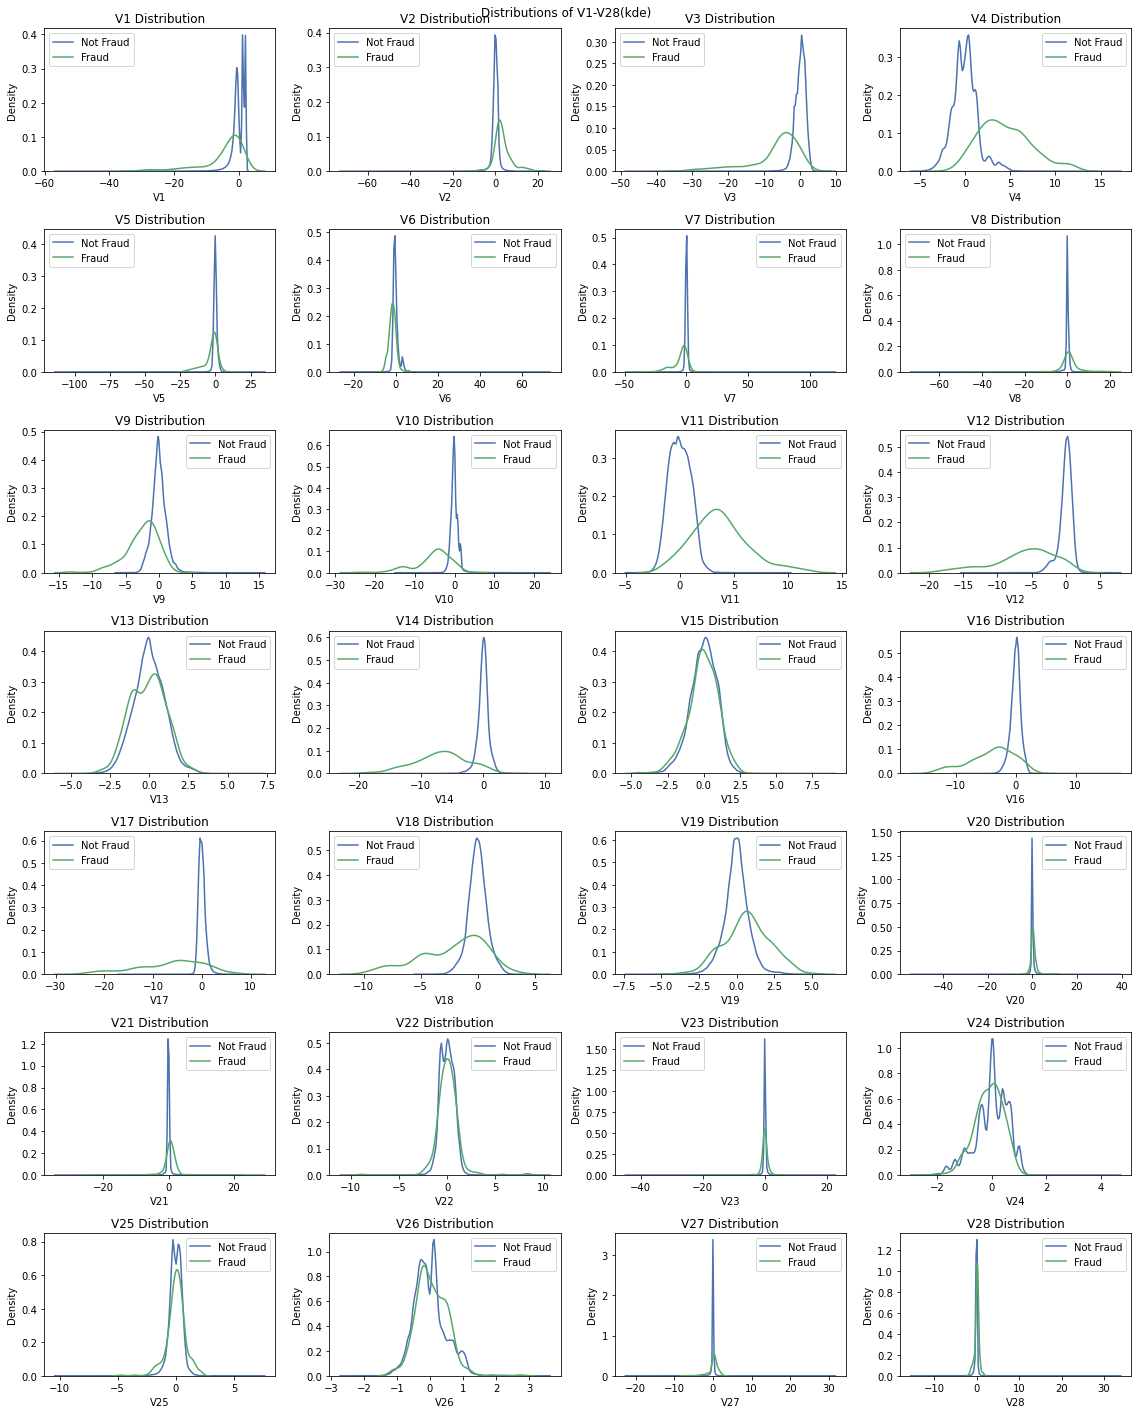

In [14]:
fig=plt.figure(figsize=(16,20))

for i, feature in enumerate(train.iloc[:,1:-2].columns):
    plt.subplot(7,4,i+1)
    sns.kdeplot(train.loc[train['Class']==0,feature], label="Not Fraud")
    sns.kdeplot(train.loc[train['Class']==1,feature], label="Fraud")
    plt.title(feature+" Distribution")
    plt.legend()
plt.suptitle('Distributions of V1-V28(kde)')
fig.tight_layout()  
plt.show()

### Distribution of transaction amounts for normal and fraudulent transactions
Normal transactions have a larger median value, larger Q1, smaller Q3 and max value equal to 25691; fraudulent transactions have a larger mean and IQR, max value is equal to 2125. We can verify that mean amount for frauds is larger than for normal ones.

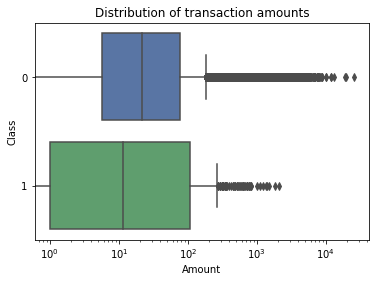

In [15]:
ax = sns.boxplot(x='Amount', y='Class', data=train, orient='h')
ax.set(title='Distribution of transaction amounts', xscale='log');

In [16]:
train.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,282356.0,88.499329,250.689934,0.0,5.67,22.0,77.50,25691.16
1,427.0,123.123372,254.228436,0.0,1.00,11.4,106.27,2125.87


Let's take a closer look at transactions with Amount equal to 0 (minimum value for both fraud and not frauds). There are 1800 records of zero value transactions, 21 of which are frauds. It's hard to imagine the purpose of fraudulent transaction with amount equal to 0, so it may be useful to drop these 21 records later on and see if the model performance could be improved.

In [17]:
train[train.Amount==0].Class.value_counts()

0    1779
1      21
Name: Class, dtype: int64

### Distribution of transaction times
The transaction times distribution patterns are relatively similar (2 spikes and 1 drop) for both frauds and normal transactions, and it's hard to establish any relationship between Class and Time (i.e. there are no such periods of time in which there are many fraudulent transactions, and almost no normal ones).

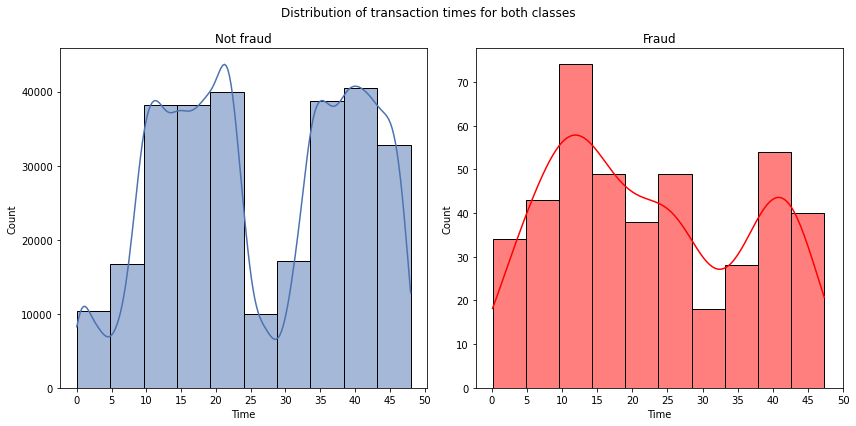

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
plt.suptitle("Distribution of transaction times for both classes")

sns.histplot(x=train[train.Class==0]['Time']/3600, bins=10, kde=True, ax=ax[0])
ax[0].set_title('Not fraud')
ax[0].set_xticks(np.arange(0,51,5))
sns.histplot(x=train[train.Class==1]['Time']/3600, kde=True, ax=ax[1], color='r')
ax[1].set_title('Fraud')
ax[1].set_xticks(np.arange(0,51,5))
plt.tight_layout()

### Correlations between features
According to the heatmap, there is no strong correlation between most features. The V1-V28 PCA components are not correlated. Time is inversely correlated with V3. There is a direct correlation between Amount and V7, V20; and an inverse correlation with V1, V5. However, there is no correlation between class, time and/or amount. I have not included paired scatter plots (sns.pairplot), but they do offer a similar pattern where most of the features are not correlated with each other.

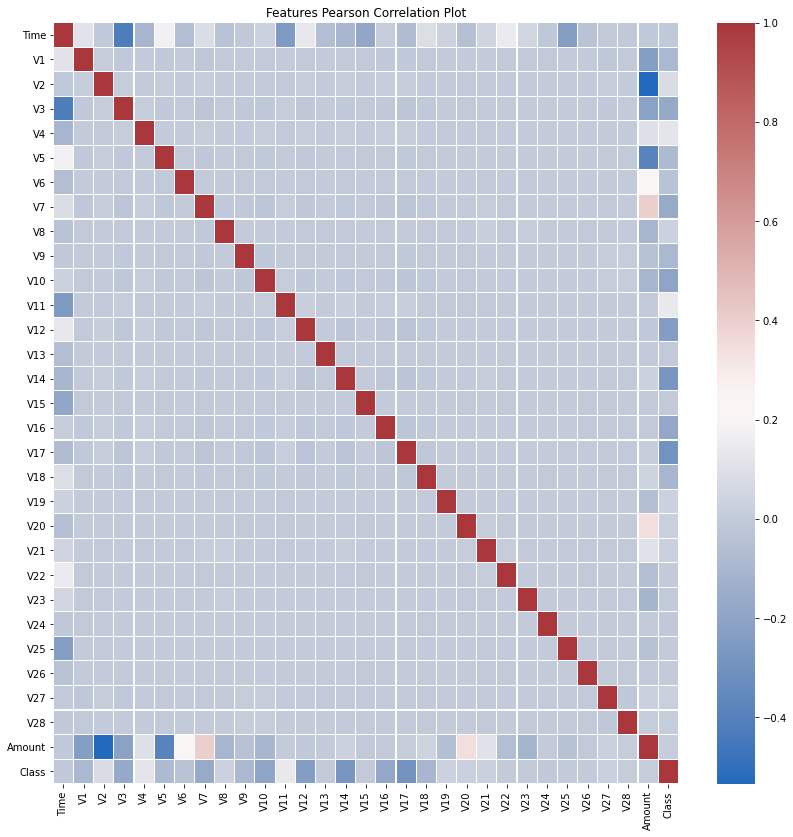

In [19]:
plt.figure(figsize = (14,14))
plt.title('Features Pearson Correlation Plot')
corr = train.corr()
# colors are as follows: red(hot) = 1, blue(cold) = -1
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1, cmap='vlag') 
plt.show()

### Module 3: Dimension Reduction

### Scaling time and amount
Some machine learning algorithms require feature scaling. For example some classifiers calculate distances between two points, so that all features should be standardized to equally contribute to the final distance. 

    "Since the range of values of raw data varies widely, in some machine learning algorithms (PCA, k-means) objective functions will not work properly without normalization. For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance" -Wikipedia

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train['Amount_scaled'] = scaler.fit_transform(train[['Amount']])
train['Time_scaled'] = scaler.fit_transform(train[['Time']])


Re-arange order of columns:

In [21]:
train_x = train[['Amount_scaled', 'Time_scaled','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']]

### Undersampling - to 3N  (2N normal + N fraud)
Due to imbalance in dataset some algorithms may overfit and assume that most transaction are normal ones.This will cause a large number of false negative results (type 2 errors), which will lead to reputational and financial losses. I undersample dataset to balance 2 classes as follows 2:1

In [22]:
fraud = train_x[train_x['Class'] == 1]
normal = train_x[train_x['Class'] == 0].sample(len(fraud)*2) # use random sample each time
train_undersampled = pd.concat([fraud,normal], ignore_index=True).sample(frac=1)# shuffle after concatenating
train_undersampled.reset_index(drop=True, inplace=True) # reset index

In [23]:
train_undersampled.Class.value_counts()

0    854
1    427
Name: Class, dtype: int64

### T-SNE and Isomap

In [24]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
X = train_undersampled.iloc[:,:-1]
y = train_undersampled.iloc[:, -1]

X_2D_tsne = TSNE(n_components=2).fit_transform(X)
X_2D_isomap = Isomap(n_components=2).fit_transform(X)

train_undersampled['t-SNEx']=X_2D_tsne[:,0]
train_undersampled['t-SNEy']=X_2D_tsne[:,1]
train_undersampled['Isomapx']=X_2D_isomap[:,0]
train_undersampled['Isomapy']=X_2D_isomap[:,1]

### Vizualizing data in 2D space using unsupervised learning, can help to understand how data is arranged in multi-dimensional space.
Both t-SNE and Isomap are non-linear dimensionality reduction algorithms. It means that they can find the structure within such complex data (non-linear polynomial relationships). I don't use PCA (linear algorithm), because it does not work well with complex data, and it also gets affected by outliers (which are present in the data). Generally the vizualizations will be better with t-SNE when compared to PCA. However global structure of the data won't be preserved, so t-SNE is only for vizualization.

From the t-SNE and Isomap graphs, we can observe 2 clusters. It means that class 0 and class 1 transactions can be distinguished based on our features (V1-V28, Time, Amount), so that supervised learning models also should be able to efficiently predict Class of the transactions.  However, there are also such fraudulent transactions that are very similar to normal ones.

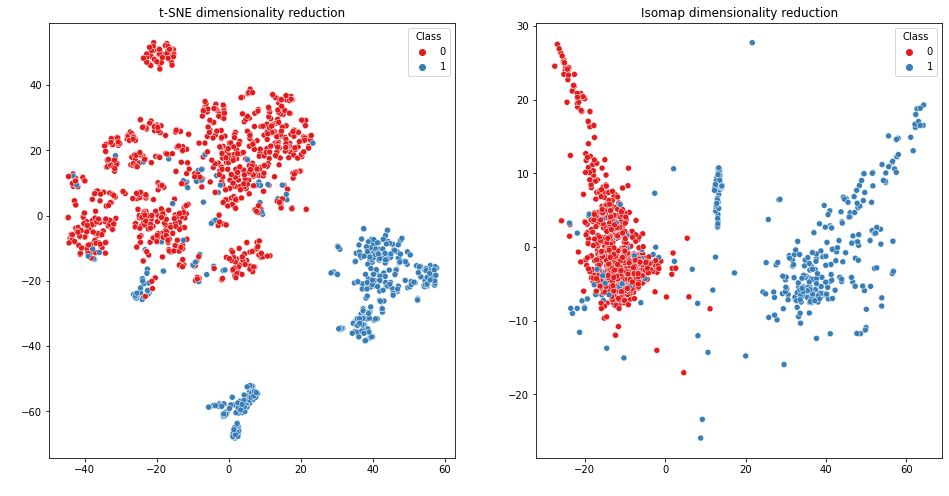

In [25]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
sns.scatterplot(x='t-SNEx', y='t-SNEy', hue='Class', data=train_undersampled, palette='Set1')
plt.xlabel(" ")
plt.ylabel(" ")
plt.title('t-SNE dimensionality reduction');

plt.subplot(1, 2, 2)
sns.scatterplot(x='Isomapx', y='Isomapy', hue='Class', data=train_undersampled, palette='Set1')
plt.xlabel(" ")
plt.ylabel(" ")
plt.title('Isomap dimensionality reduction');

Drop columns:

In [26]:
train_undersampled.drop(['t-SNEx','t-SNEy', 'Isomapx', 'Isomapy'], axis=1, inplace=True)

### Module 4: Classification

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

### Remove scaled features and undersample non-scaled data

In [28]:
train = train[['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']]

fraud = train[train['Class'] == 1]
normal = train[train['Class'] == 0].sample(len(fraud)*2) # use random sample each time
train_undersampled = pd.concat([fraud,normal], ignore_index=True).sample(frac=1)# shuffle after concatenating
train_undersampled.reset_index(drop=True, inplace=True) # reset index

In [29]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:, -1]
X = train_undersampled.iloc[:,:-1]
y = train_undersampled.iloc[:, -1]

### Logistic regression

In [30]:
logreg=LogisticRegression()
logreg.fit(X,y)
logreg_pred = logreg.predict(X_test)

print("Logistic regression has an average of", round(cross_val_score(logreg, X, y, cv=5).mean(), 4) * 100, 
      "% cross validation accuracy, and ", round(accuracy_score(y_test, logreg_pred), 4)* 100, 
      "% accuracy score on test dataset")

Logistic regression has an average of 93.99 % cross validation accuracy, and  96.0 % accuracy score on test dataset


### Quadratic Discriminant Analysis

In [31]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X,y)
QDA_pred = QDA.predict(X_test)

print("Logistic regression has an average of", round(cross_val_score(QDA, X, y, cv=5).mean(), 4) * 100, 
      "% cross validation accuracy, and ", round(accuracy_score(y_test, QDA_pred), 4)* 100, 
      "% accuracy score on test dataset")

Logistic regression has an average of 92.97 % cross validation accuracy, and  97.33000000000001 % accuracy score on test dataset


### Random forest classifier

In [32]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X,y)
rf_pred = RandomForest.predict(X_test)
print("Random forest regression has an average of", round(cross_val_score(RandomForest, X, y, cv=5).mean(), 4) * 100, 
      "% cross validation accuracy, and", round(accuracy_score(y_test, rf_pred), 4) * 100, 
      "% accuracy score on test dataset")

Random forest regression has an average of 94.61 % cross validation accuracy, and 98.0 % accuracy score on test dataset


#### Use grid search and 5 fold cross validation to get best hyperparameters

In [33]:
param_grid = [{'n_estimators': [50, 100, 250, 500], 'max_depth': [5, 10, 15, 25]}]

grid_search_forest = GridSearchCV(RandomForest, param_grid, cv=5)
grid_search_forest.fit(X,y)
grid_search_forest.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=50)

#### Slightly improved accuracy on test dataset

In [34]:
rf_pred = grid_search_forest.best_estimator_.predict(X_test)

print("Random forest (tuned) has an average of", round(cross_val_score(grid_search_forest.best_estimator_, X, y, cv=5).mean(), 4) * 100, 
      "% cross validation accuracy, and", round(accuracy_score(y_test, rf_pred), 4) * 100, 
      "% accuracy score on test dataset")

Random forest (tuned) has an average of 94.61 % cross validation accuracy, and 96.67 % accuracy score on test dataset


### Comparison

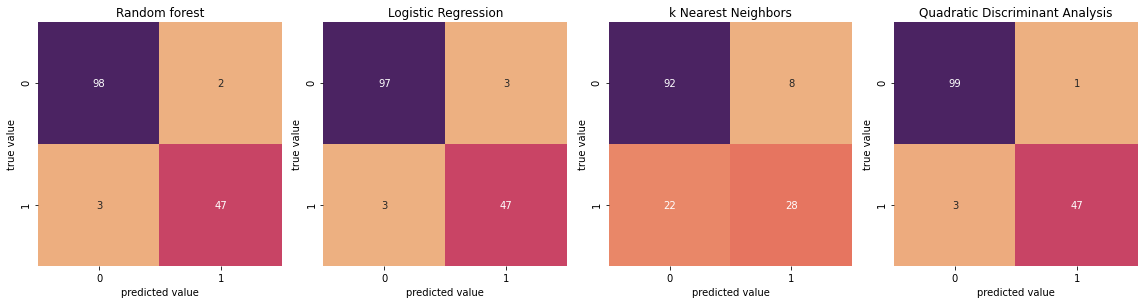

In [38]:
plt.figure(figsize=(16,8))

plt.subplot(1, 3, 1)
mat = confusion_matrix(y_test, rf_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='flare')
plt.title('Random forest')
plt.xlabel('predicted value')
plt.ylabel('true value');

plt.subplot(1, 3, 2)
mat = confusion_matrix(y_test, logreg_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='flare')
plt.title('Logistic Regression')
plt.xlabel('predicted value')
plt.ylabel('true value');

plt.subplot(1, 3, 3)
mat = confusion_matrix(y_test, QDA_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='flare')
plt.title('Quadratic Discriminant Analysis')
plt.xlabel('predicted value')
plt.ylabel('true value')

plt.tight_layout()

### Recall Score
When considering accuracy, banks usually should pay very close attention for false negatives errors (treat a fraudulent transaction as normal) as they are the most dangerous and harmful. While making a false-positive mistake (treat a regular transaction as a fraud) is relatively safe for both clients and banks, false-negative errors can cause large reputational and financial damage. Recall metric is the ability of model to find all frauds.

True positive / (True positive + False Negative)

In [39]:
from sklearn.metrics import recall_score
print("QDA has a recall_score of:", round(recall_score(y_test, QDA_pred), 4) * 100, "%")
print("Logistic regression has a recall_score of:", round(recall_score(y_test, logreg_pred), 4) * 100, "%")
print("Random forest has a recall_score of:", round(recall_score(y_test, rf_pred), 4) * 100, "%")

K-nearest-neighbors has a recall_score of: 56.00000000000001 %
QDA has a recall_score of: 94.0 %
Logistic regression has a recall_score of: 94.0 %
Random forest has a recall_score of: 94.0 %


I did some trials with different undersampled data to see how results change. On average grid, search gives small improvement for both CV score, accuracy and recall for Random forest. All models each time have relatively similar performance. QDA is the worst one in terms of CV score, recall and accuracy, whereas random forest is best, but not too far from logistic regression.

Note: Cross validation accuracy score is evaluated on 5 folds  of train data; Recall and accuracy are evaluated on test data.

### Module 5: Summary

The objective of this project was to analyse credit card data, get some meaningful insights to determine whether we can effectively distinguish suspicious transactions from normal ones, and build a machine learning model to predict transaction type.

1. Data has 28 anonymised features (V1-V28), time, amount, and transaction Class. The aim is to predict transaction Class (0 or 1) based on other features. With basic EDA I dropped duplicate and missing values, checked outliers and decided to keep them. I also checked some descriptive statistics of the features (df.describe()), to get basic understanding of features distributions.
2. After that, I did some simple visualizations to verify assumptions made in module 1, and see the distribution of each feature. Turned out that V1-V28 were standardized for PCA and therefore have normal distributions. However, for fraudulent transactions distributions of some PCA components are skewed/different from normal ones. By checking distributions of Time and Amount, as well as a correlation matrix, I established that there is no significant relationship/correlation of Time or Amount with Class
3. I standardized remaining 2 features (Time and Amount), so that dataset is standardized. I also undersample data, by partitioning 2N normal and N fraudulent transactions from shuffled dataset, where N is total number of fraudulent transactions. Then I apply t-SNE and ISOMAP dimensionality reduction algorithms, to visualize data in 2D space. These visualizations have shown that predictive models can effectively detect fraudulent transactions.
4. Finally, I build 3 different prediction models (QDA, random forest, and logistic regression). I established that random forest (tuned), and logistic regression have relatively similar performance in terms of average cross validation score on train data; recall score and accuracy on test data.

I would consider both CV score and holdout dataset accuracy for final model selection. Since 3 models have the similar performance it is logical to choose the most computationally efficient model. Logistic regression is the simplest and fastest model. That's why it makes sense to choose it for production and business. In conclusion, credit card fraud detection is a very important task for all banks and fortunately, it can be effectively solved using machine learning methods.